<a href="https://colab.research.google.com/github/Eben-M/ML-AI-Projects/blob/main/Copy_of_Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, LSTM, Input
import os
import tensorflow as tf
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Get access to folders

In [14]:
#get current working directory
os.getcwd() 

'/content'

In [4]:
#files in directory
os.listdir()

['.config', 'drive', 'sample_data']

In [15]:
pictures = os.getcwd() + '/' + str(os.listdir()[1]) 
path = '/content/drive/MyDrive/ML/Agricultural-crops'
print(pictures)

/content/drive


In [17]:
#create a list of all available pictures
new = []
for folder,sub_folders,files in os.walk(path):
    for j in files:
        new.append(folder + '/' +  str (j))
        
new

['/content/drive/MyDrive/ML/Agricultural-crops/almond/image (13).jpg',
 '/content/drive/MyDrive/ML/Agricultural-crops/almond/image (12).jpg',
 '/content/drive/MyDrive/ML/Agricultural-crops/almond/image (10).jpg',
 '/content/drive/MyDrive/ML/Agricultural-crops/almond/image (11).jpg',
 '/content/drive/MyDrive/ML/Agricultural-crops/almond/image (1).jpg',
 '/content/drive/MyDrive/ML/Agricultural-crops/almond/image (1).png',
 '/content/drive/MyDrive/ML/Agricultural-crops/almond/image (5).jpg',
 '/content/drive/MyDrive/ML/Agricultural-crops/almond/image (9).jpg',
 '/content/drive/MyDrive/ML/Agricultural-crops/almond/image (6).jpg',
 '/content/drive/MyDrive/ML/Agricultural-crops/almond/image (7).jpg',
 '/content/drive/MyDrive/ML/Agricultural-crops/almond/image (8).jpg',
 '/content/drive/MyDrive/ML/Agricultural-crops/almond/image (4).jpg',
 '/content/drive/MyDrive/ML/Agricultural-crops/almond/image (2).jpg',
 '/content/drive/MyDrive/ML/Agricultural-crops/almond/image (3).png',
 '/content/drive

# Create dataframe

In [18]:
#create label from the link
label = []
for i in new[1:]:
    label.append(str(i).split('/')[6])
label

['almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'almond',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'cardamom',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',
 'Cherry',

In [19]:
data = pd.DataFrame(data = zip(new,label), columns = ['filepath', 'Label'] )
data

,filepath,Label
0,/content/drive/MyDrive/ML/Agricultural-crops/a...,almond
1,/content/drive/MyDrive/ML/Agricultural-crops/a...,almond
2,/content/drive/MyDrive/ML/Agricultural-crops/a...,almond
3,/content/drive/MyDrive/ML/Agricultural-crops/a...,almond
4,/content/drive/MyDrive/ML/Agricultural-crops/a...,almond
...,...,...
823,/content/drive/MyDrive/ML/Agricultural-crops/w...,wheat
824,/content/drive/MyDrive/ML/Agricultural-crops/w...,wheat
825,/content/drive/MyDrive/ML/Agricultural-crops/w...,wheat
826,/content/drive/MyDrive/ML/Agricultural-crops/w...,wheat


In [20]:
data['Label'].value_counts()

Pearl_millet(bajra)    39
Tobacco-plant          33
cotton                 32
Cherry                 32
maize                  31
banana                 31
Cucumber               31
wheat                  31
jowar                  30
clove                  30
Olive-tree             30
soyabean               30
Coffee-plant           29
rice                   29
Lemon                  28
mustard-oil            28
vigna-radiati(Mung)    27
tomato                 26
gram                   25
coconut                25
pineapple              25
sugarcane              25
sunflower              24
tea                    23
chilli                 23
papaya                 23
jute                   23
Fox_nut(Makhana)       23
cardamom               22
almond                 20
Name: Label, dtype: int64

# Visualise the image randomly

ValueError: ignored

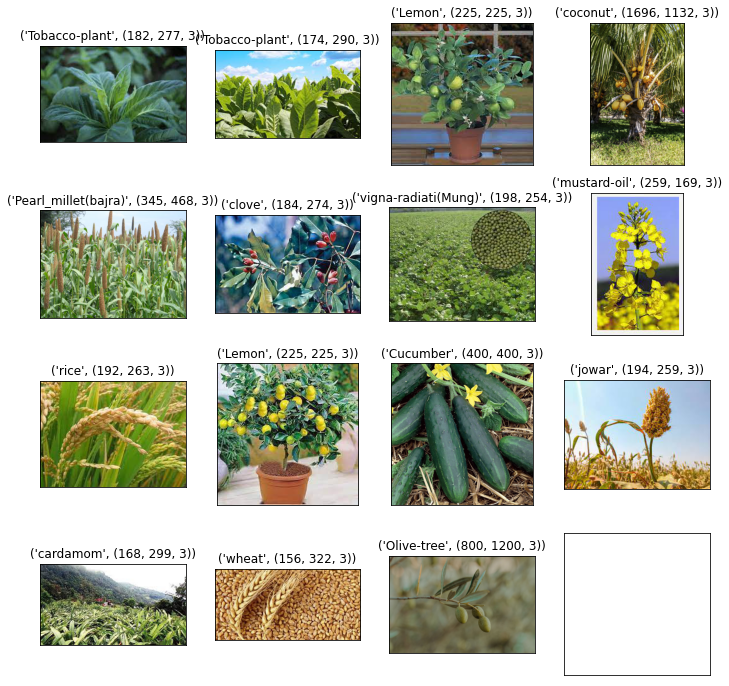

In [21]:
#plt shows rgb while cv2 converts to array but colour is in bgr,we then convert
index = np.random.randint(0, len(data), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data['filepath'][index[i]]))
    ax.set_title((data['Label'][index[i]],cv2.imread(data['filepath'][index[i]]).shape))
    
plt.tight_layout()
plt.show()

In [22]:
image_gen = ImageDataGenerator(rotation_range=0, # rotate the image by 30 degrees, 180 flips it upsid down
                               width_shift_range=0.00, # Shift the pic width by a max of 10% #making it bigger
                               height_shift_range=0.00, # Shift the pic height by a max of 10% #making it bigger
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.05, # Zoom in 
                               horizontal_flip=True, # Allo horizontal flipping, moves image object from left to right, there is also vertical flip
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

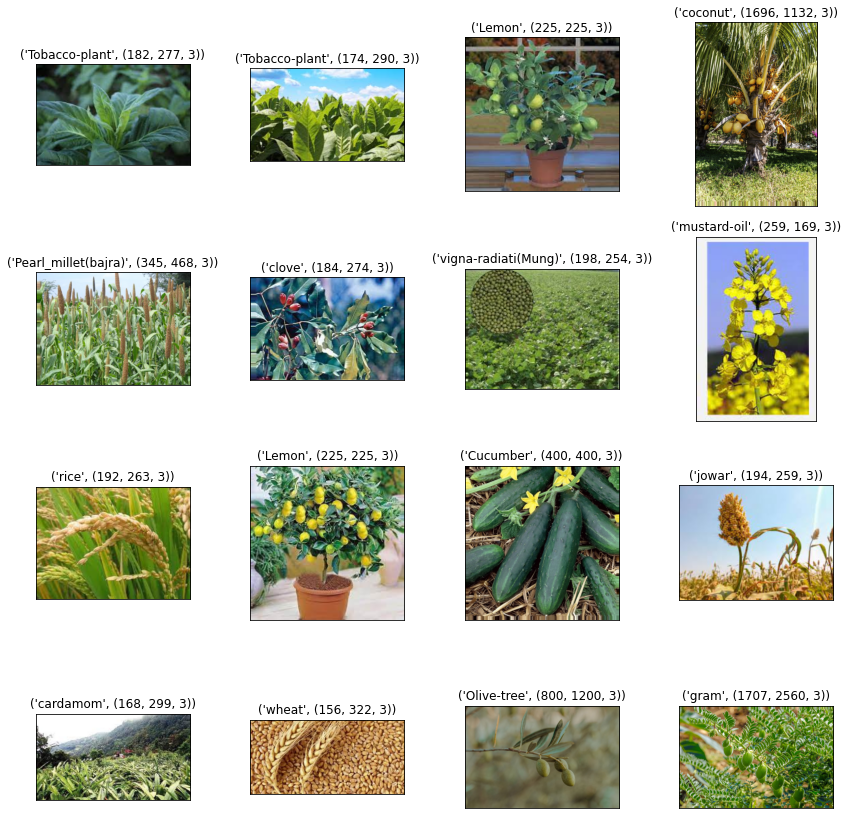

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img =  cv2.cvtColor(cv2.imread(data['filepath'][index[i]]), cv2.COLOR_BGR2RGB) #image gen only works with cv2
    img = image_gen.random_transform(img)
    ax.imshow((img))
    ax.set_title((data['Label'][index[i]],cv2.imread(data['filepath'][index[i]]).shape))
    
    
plt.tight_layout()
plt.show()

In [24]:
index

array([738, 713, 397, 162, 546, 129, 777, 454, 605, 388, 261, 328,  52,
       814, 469, 306])

# SPLIT DATASET

In [25]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.35, shuffle=True, random_state=44)

In [26]:
len(train_data)

538

In [27]:
test_data.shape

(290, 2)

In [28]:
len(test_data)

290

In [29]:
trainimg = image_gen.flow_from_dataframe(dataframe= train_data,x_col='filepath',
                                               y_col='Label',target_size=(150, 150),color_mode='rgb',
                                               batch_size=16,
                                               class_mode='categorical') #binary if they are only two classes

Found 538 validated image filenames belonging to 30 classes.


In [30]:
testimg = image_gen.flow_from_dataframe(dataframe= test_data,x_col='filepath',
                                               y_col='Label',target_size=(150, 150),color_mode='rgb',
                                               batch_size=16,
                                               class_mode='categorical') #binary if they are only two classes

Found 290 validated image filenames belonging to 30 classes.


In [31]:
testimg.class_indices

{'Cherry': 0,
 'Coffee-plant': 1,
 'Cucumber': 2,
 'Fox_nut(Makhana)': 3,
 'Lemon': 4,
 'Olive-tree': 5,
 'Pearl_millet(bajra)': 6,
 'Tobacco-plant': 7,
 'almond': 8,
 'banana': 9,
 'cardamom': 10,
 'chilli': 11,
 'clove': 12,
 'coconut': 13,
 'cotton': 14,
 'gram': 15,
 'jowar': 16,
 'jute': 17,
 'maize': 18,
 'mustard-oil': 19,
 'papaya': 20,
 'pineapple': 21,
 'rice': 22,
 'soyabean': 23,
 'sugarcane': 24,
 'sunflower': 25,
 'tea': 26,
 'tomato': 27,
 'vigna-radiati(Mung)': 28,
 'wheat': 29}

In [32]:
from tensorflow.keras.optimizers import Adam

# BUILD MODEL

In [116]:
model = Sequential()

#convolutional layer


#model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=(100, 100,3), activation='relu')) 
#model.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=(150, 150,3), activation='relu', padding = 'same')) 
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding = 'same')) 
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))




#flatten from 2d to 1d, h,w to 1d
model.add(Flatten())


#dense layer





model.add(Dense(200, activation = 'relu'))
#model.add(Dropout(0.2))

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.2))

#model.add(Dense(150, activation = 'relu'))
#model.add(Dropout(0.2))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.2))


model.add(Dense(30, activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [117]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 150, 150, 8)       224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 8)        0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 75, 75, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 flatten_28 (Flatten)        (None, 21904)             0         
                                                                 
 dense_38 (Dense)            (None, 200)             

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
callbacks=[early_stop]

In [36]:
results = model.fit(trainimg,steps_per_epoch=14,validation_data=testimg,validation_steps= 10,verbose=1,epochs=50)

Epoch 1/50
14/14 [==============================] - 96s 7s/step - loss: 3.6838 - accuracy: 0.0229 - val_loss: 3.3983 - val_accuracy: 0.0437
Epoch 2/50
14/14 [==============================] - 81s 6s/step - loss: 3.4080 - accuracy: 0.0413 - val_loss: 3.3890 - val_accuracy: 0.0375
Epoch 3/50
 5/14 [=========>....................] - ETA: 12s - loss: 3.3917 - accuracy: 0.0625

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)


14/14 [==============================] - 28s 2s/step - loss: 3.3884 - accuracy: 0.0446 - val_loss: 3.3771 - val_accuracy: 0.0688
Epoch 4/50
14/14 [==============================] - 22s 2s/step - loss: 3.3942 - accuracy: 0.0536 - val_loss: 3.3973 - val_accuracy: 0.0312
Epoch 5/50
14/14 [==============================] - 14s 1s/step - loss: 3.3652 - accuracy: 0.0446 - val_loss: 3.3616 - val_accuracy: 0.0750
Epoch 6/50
14/14 [==============================] - 13s 924ms/step - loss: 3.3342 - accuracy: 0.0688 - val_loss: 3.3691 - val_accuracy: 0.0375
Epoch 7/50
14/14 [==============================] - 9s 674ms/step - loss: 3.3573 - accuracy: 0.0459 - val_loss: 3.3897 - val_accuracy: 0.0437
Epoch 8/50
14/14 [==============================] - 11s 756ms/step - loss: 3.3143 - accuracy: 0.0759 - val_loss: 3.2925 - val_accuracy: 0.0812
Epoch 9/50
14/14 [==============================] - 10s 759ms/step - loss: 3.2566 - accuracy: 0.0938 - val_loss: 3.2521 - val_accuracy: 0.0688
Epoch 10/50
14/14 [=

In [37]:
model.evaluate(testimg)

19/19 [==============================] - 6s 307ms/step - loss: 3.5151 - accuracy: 0.2345


[3.515099287033081, 0.2344827651977539]

##LSTMCONV


In [118]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers import ConvLSTM2D
from keras.layers import TimeDistributed
#from keras.layers.normalization import BatchNormalization

In [148]:

from keras.layers.reshaping.reshape import Reshape
from numpy.ma.core import reshape

modelr = Sequential()

shape =
def ReshapeLayer(x):
  reshape = Reshape((shape[1],shape[2]*shape[3]))(x)
  return reshape


modelr.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150, 150,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
#model2.add(ConvLSTM2D(filters=16, kernel_size=(3,3), activation='relu',padding = 'same')) 
#modelr.add(Flatten())
#model.add(RepeatVector(30))
#modelr.add(TimeDistributed(modelr))
model.add(Lamda(ReshapeLayer))
modelr.add(LSTM(units=20, input_shape=(1,3),return_sequences=True))


modelr.add(Dense(200, activation = 'relu'))

modelr.add(Dense(30, activation = 'softmax'))


modelr.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

ValueError: ignored

In [145]:
modelr.summary()

ValueError: ignored

In [94]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
callbacks=[early_stop]

In [150]:
trainimg.shape


AttributeError: ignored

In [95]:
result = model2.fit(trainimg,steps_per_epoch=14,validation_data=testimg,validation_steps= 10,verbose=1,epochs=5)

Epoch 1/5


ValueError: ignored

# LSTM

In [ ]:
data

,filepath,Label,image
0,/Users/gabriel/Documents/Machine learning Tens...,gram,"[[[173, 205, 180], [158, 196, 172], [174, 212,..."
1,/Users/gabriel/Documents/Machine learning Tens...,gram,"[[[211, 189, 177], [211, 189, 177], [211, 189,..."
2,/Users/gabriel/Documents/Machine learning Tens...,gram,"[[[52, 94, 106], [36, 72, 85], [60, 90, 104], ..."
3,/Users/gabriel/Documents/Machine learning Tens...,gram,"[[[247, 247, 247], [247, 247, 247], [247, 247,..."
4,/Users/gabriel/Documents/Machine learning Tens...,gram,"[[[254, 248, 243], [254, 248, 243], [254, 248,..."
...,...,...,...
823,/Users/gabriel/Documents/Machine learning Tens...,maize,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
824,/Users/gabriel/Documents/Machine learning Tens...,maize,"[[[229, 208, 181], [230, 208, 181], [231, 208,..."
825,/Users/gabriel/Documents/Machine learning Tens...,maize,"[[[167, 202, 228], [163, 196, 228], [165, 200,..."
826,/Users/gabriel/Documents/Machine learning Tens...,maize,"[[[48, 199, 119], [15, 143, 71], [89, 193, 127..."


In [ ]:
image = data['filepath'][200]



In [ ]:
image.shape

AttributeError: 'str' object has no attribute 'shape'

In [ ]:
plt.imshow(plt.imread(image))

# import cv2
import numpy as np

img = cv2.imread('your_image.jpg')
res = cv2.resize(img, dsize=(54, 140), interpolation=cv2.INTER_CUBIC)









import numpy as np
from PIL import Image

arr = np.load('img.npy')
img = Image.fromarray(arr)
img.resize(size=(100, 100))





INTER_NEAREST - a nearest-neighbor interpolation
INTER_LINEAR - a bilinear interpolation (used by default)
INTER_AREA - resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the  INTER_NEAREST method.
INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood
INTER_LANCZOS4 - a Lanczos interpolation over 8x8 pixel neighborhood

In [ ]:
img = cv2.imread(image)
new = cv2.resize(img, dsize=(150, 150))

(150, 150, 3)

In [ ]:
data['image'] = data['filepath'].apply(lambda x :cv2.resize(cv2.imread(x), dsize = (150,150)))

In [ ]:
data['']

,filepath,Label,image
0,/Users/gabriel/Documents/Machine learning Tens...,gram,"[[[173, 205, 180], [158, 196, 172], [174, 212,..."
1,/Users/gabriel/Documents/Machine learning Tens...,gram,"[[[211, 189, 177], [211, 189, 177], [211, 189,..."
2,/Users/gabriel/Documents/Machine learning Tens...,gram,"[[[52, 94, 106], [36, 72, 85], [60, 90, 104], ..."
3,/Users/gabriel/Documents/Machine learning Tens...,gram,"[[[247, 247, 247], [247, 247, 247], [247, 247,..."
4,/Users/gabriel/Documents/Machine learning Tens...,gram,"[[[254, 248, 243], [254, 248, 243], [254, 248,..."
...,...,...,...
823,/Users/gabriel/Documents/Machine learning Tens...,maize,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
824,/Users/gabriel/Documents/Machine learning Tens...,maize,"[[[229, 208, 181], [230, 208, 181], [231, 208,..."
825,/Users/gabriel/Documents/Machine learning Tens...,maize,"[[[167, 202, 228], [163, 196, 228], [165, 200,..."
826,/Users/gabriel/Documents/Machine learning Tens...,maize,"[[[48, 199, 119], [15, 143, 71], [89, 193, 127..."


In [ ]:
X = data.drop(['filepath', 'Label'], axis = 1).values
y = data['Label'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=101)

In [ ]:
X_train[5].shape

(1,)

In [ ]:
cv2.imshow(cv2.imread(X_train[5]))

TypeError: Can't convert object to 'str' for 'filename'

In [ ]:
trainimg = image_gen.flow_from_dataframe(dataframe= train_data,x_col='filepath',
                                               y_col='Label',target_size=(150, 150),color_mode='rgb',
                                               batch_size=16,
                                               class_mode='categorical') #binary if they are only two classes

In [ ]:
from sklearn.model_selection import train_test_split
X = train_test_split(data, test_size=0.35, shuffle=True, random_state=44)

In [ ]:
image_gen.()

In [ ]:
image_gen = ImageDataGenerator(rotation_range=0, # rotate the image by 30 degrees, 180 flips it upsid down
                               width_shift_range=0.00, # Shift the pic width by a max of 10% #making it bigger
                               height_shift_range=0.00, # Shift the pic height by a max of 10% #making it bigger
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.05, # Zoom in 
                               horizontal_flip=True, # Allo horizontal flipping, moves image object from left to right, there is also vertical flip
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
a=int(input("enter number"))
if a=1:
   for x in range(2,a):
         if(a%x)==0:
          print("not prime")
   break
   else:
      print("Prime")
else:
   print("not prime")

SyntaxError: ignored

In [ ]:
n=int(input("enter number"))
if n > 1:
	for i in range(2, int(n/2)+1):
		if (n % i) == 0:
			print(n, "is not a prime number")
		break
	else:
		print(n, "is a prime number")
# If the number is less than 1, its also not a prime number.
else:
	print(n, "is not a prime number")

enter number6
6 is not a prime number


In [ ]:
a=input("enter sequence")
b=a[::-1]
if a==b:
  print("palindrome")
else:
  print("Not a Palindrome")

enter sequencekayak
palindrome


In [ ]:
list = ["1", "4", "0", "6", "9"]
#list = [int(i) for i in list]
list.sort()
print (list)

['0', '1', '4', '6', '9']


In [ ]:
a = lambda x,y: (x+y)

In [ ]:
a(2,3)

5

In [ ]:
def fib(n):
   if n == 1:
      return 1
   elif n == 0:   
      return 0            
   else:                      
      return fib(n-1) + fib(n-2)        

In [ ]:
#6x= 
fib(6)

8